<center><h1><b><span style="color:#563F7E">DM MINI PROJECT</span></b></h1>

<h2><span style="color:#FFFFFF"><u><mark style="color:#A20080;">Data Acquisition and Preprocessing</mark></u></span></h2><br>

> Importing all the necessary packages for the project.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

In [5]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from warnings import filterwarnings
# from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
# import missingno as msno
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
# from sklearn.neighbors import LocalOutlierFactor
# from scipy.stats import levene
# from scipy.stats import shapiro
# from scipy.stats.stats import pearsonr
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# from sklearn.preprocessing import scale
# from sklearn.model_selection import ShuffleSplit, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import model_selection
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import BaggingRegressor
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.cross_decomposition import PLSRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import ElasticNetCV
# from sklearn import linear_model
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
# import xgboost as xgb
# from xgboost import XGBRegressor, XGBClassifier
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn import tree
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [7]:
filterwarnings("ignore")

##### pd.Categorical sorts the data according to the row specified.

In [10]:
Heart = pd.read_csv("heart.csv")
data = Heart.copy()

dataV = data.copy()
dataV["sex"] = pd.Categorical(dataV["sex"])
dataV["cp"] = pd.Categorical(dataV["cp"])
dataV["fbs"] = pd.Categorical(dataV["fbs"])
dataV["restecg"] = pd.Categorical(dataV["restecg"])
dataV["exng"] = pd.Categorical(dataV["exng"])
dataV["slp"] = pd.Categorical(dataV["slp"])
dataV["caa"] = pd.Categorical(dataV["caa"])
dataV["thall"] = pd.Categorical(dataV["thall"])
dataV["output"] = pd.Categorical(dataV["output"])

df = data.select_dtypes(include=["float64","int64","int32"]) #Include the various datatypes.

In [12]:
data.shape #the shape of the dataset

(303, 14)

In [15]:
data.columns #the columns present in the dataset.

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
data.info() #provides a summary of the type of data, the count, and non-null rows for each attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
data.describe() #provides the count, mean, max, min, etc values of the given dataset.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
data.corr() #Tells how every attribute is correlated to every other attribute.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [25]:
print(data.isnull().sum()) #shows the number of null rows present in the dataset.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


<h2><span style="color:#FFFFFF"><u><mark style="color:#A20080;">Data Visualization</mark></u></span></h2><br>

In [26]:
corrPearson = data.corr(method="pearson")

#### PEARSON CORRELATION - HEATMAP

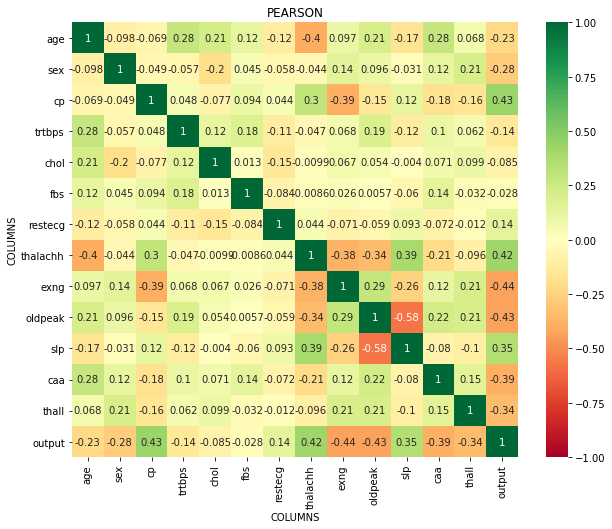

In [84]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

#### HISTOGRAM

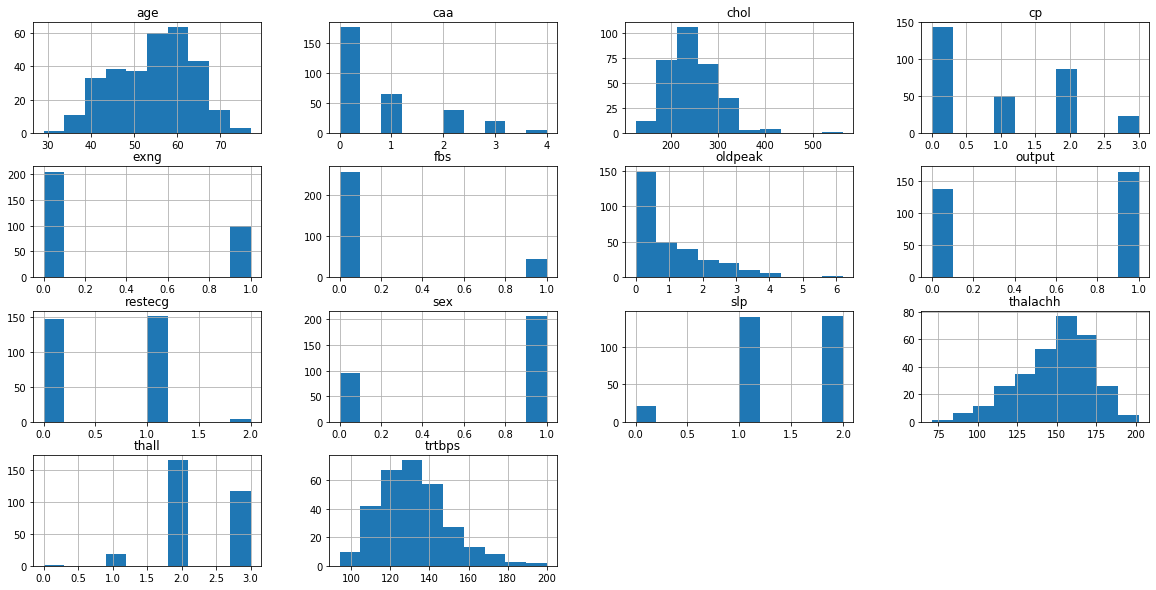

In [27]:
data.hist(figsize=(20,10))
plt.show() #Depicts the dataset as histograms, x-axis is the range of values, 
#y-axis is the number of rows corresponding to that value.

#### BOX

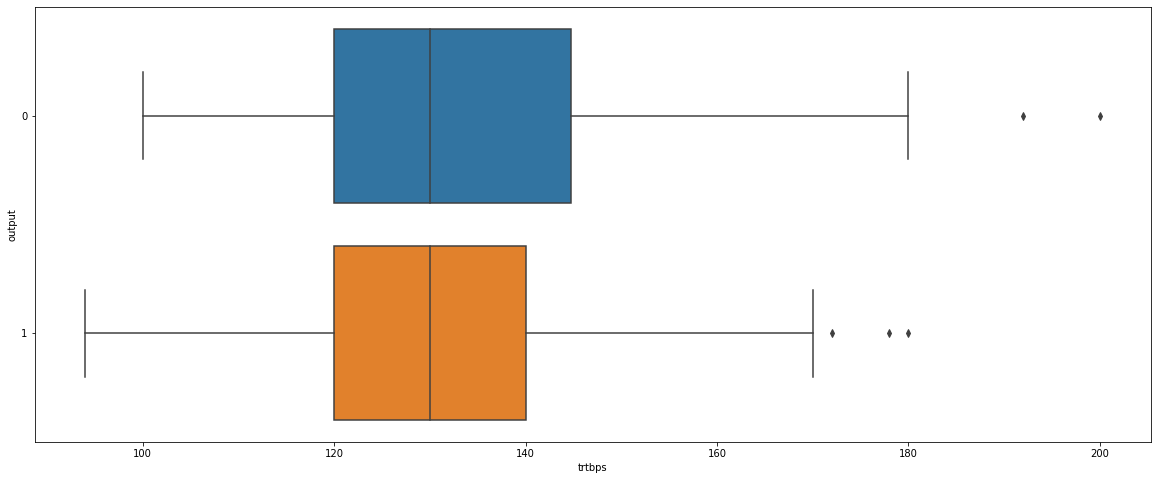

In [28]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="trtbps",y="output",data=dataV)
plt.show() #Depicts the avg, min and max for every Attribute, y-axis depicts the output column, X-axis depicts
#the attribute chosen

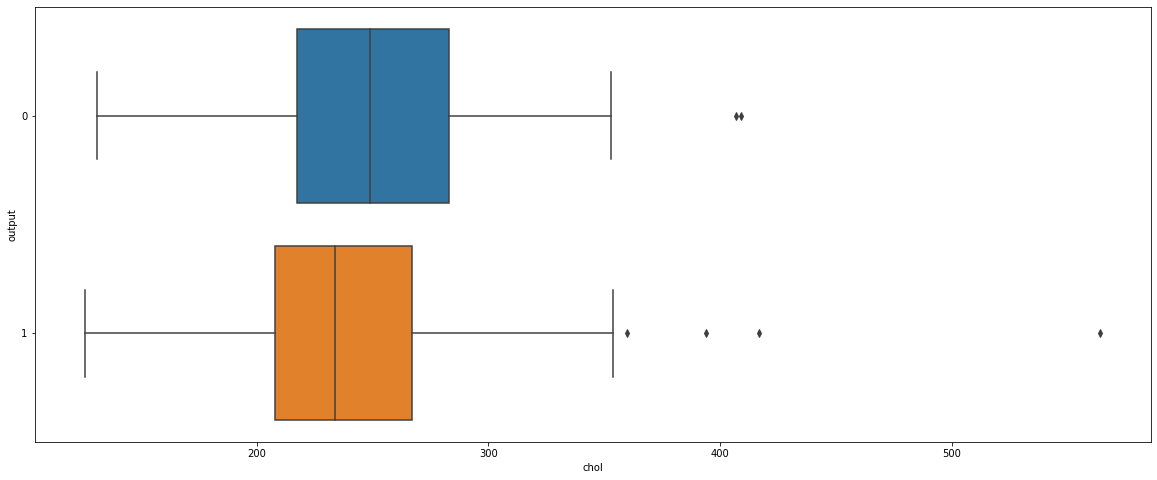

In [29]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="chol",y="output",data=dataV)
plt.show()

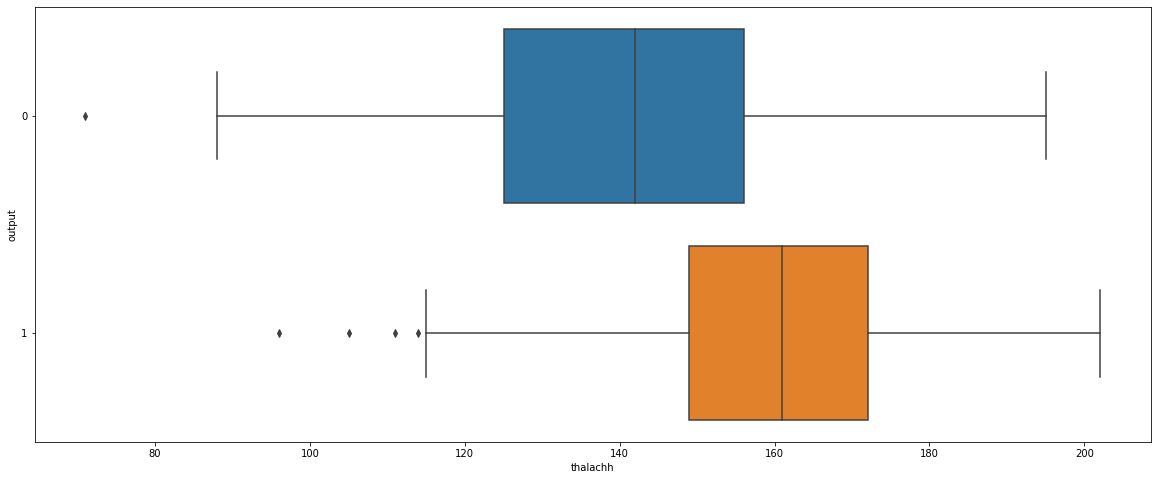

In [30]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="thalachh",y="output",data=dataV)
plt.show()

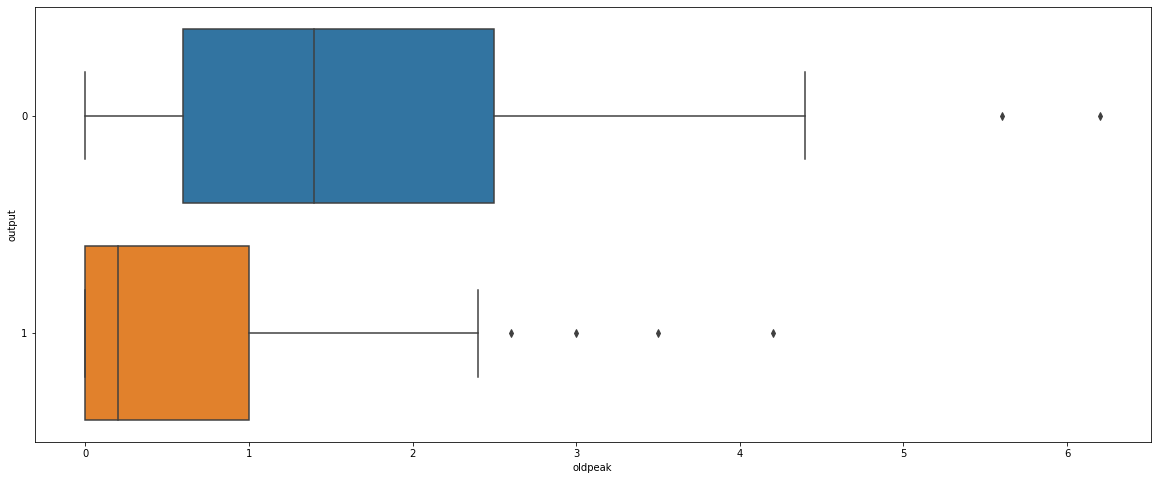

In [31]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="oldpeak",y="output",data=dataV)
plt.show()

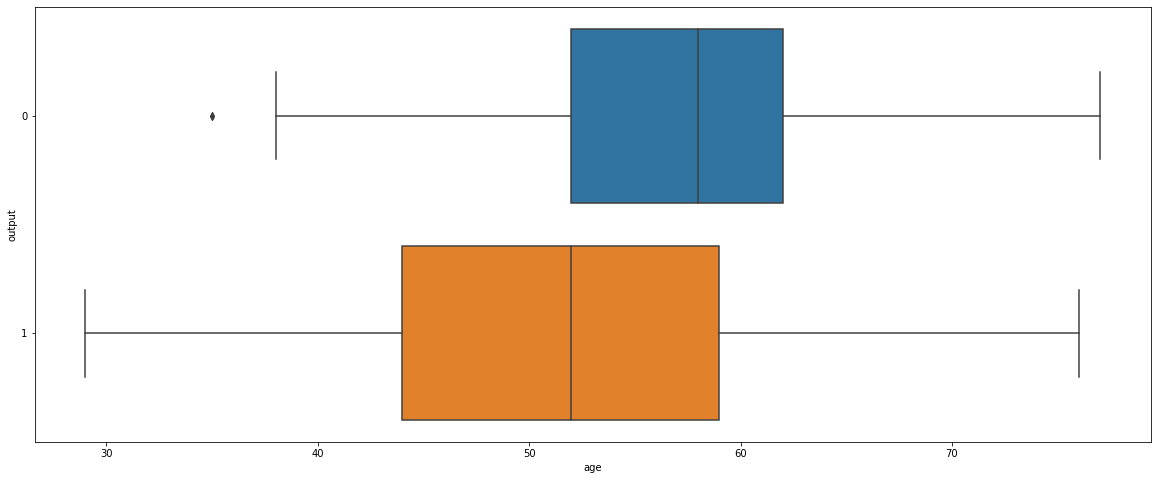

In [32]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="age",y="output",data=dataV)
plt.show()

#### BAR

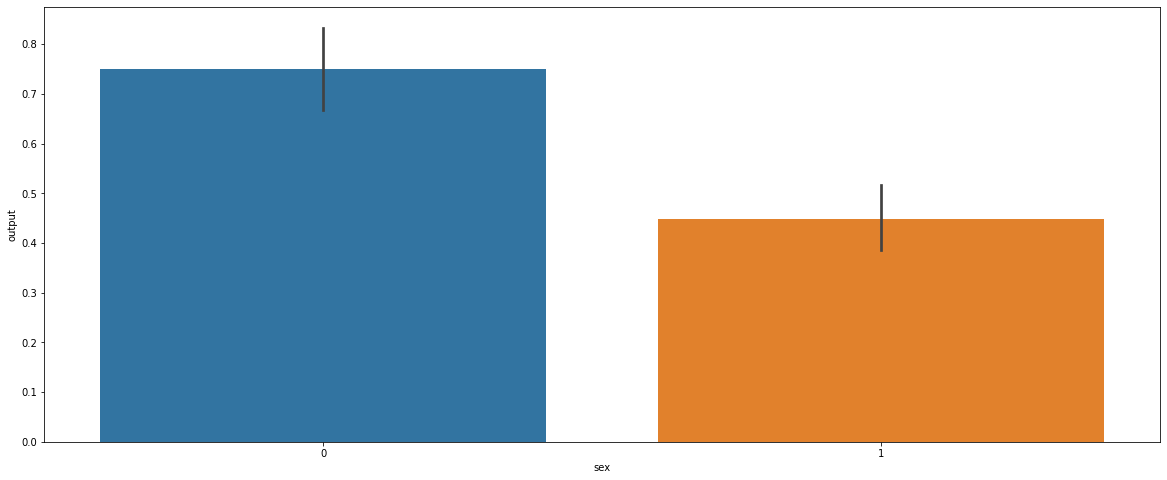

In [94]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="sex",y="output",data=data)
plt.show()

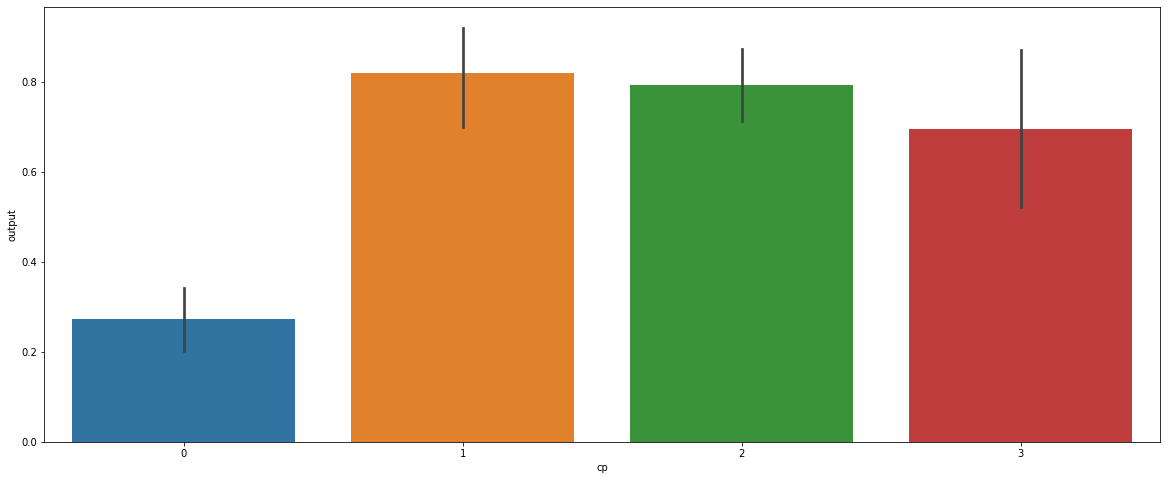

In [95]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="cp",y="output",data=data)
plt.show()

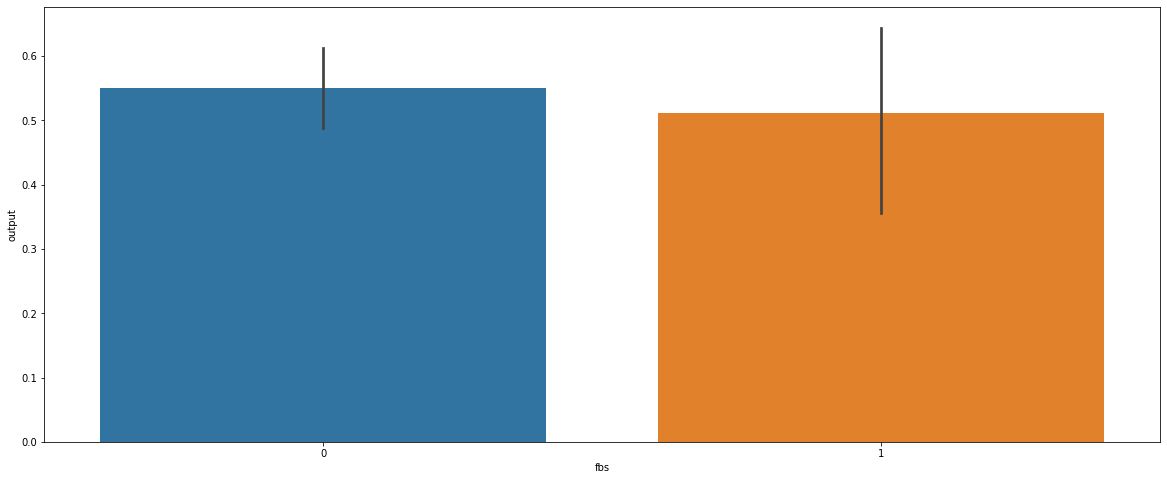

In [96]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="fbs",y="output",data=data)
plt.show()

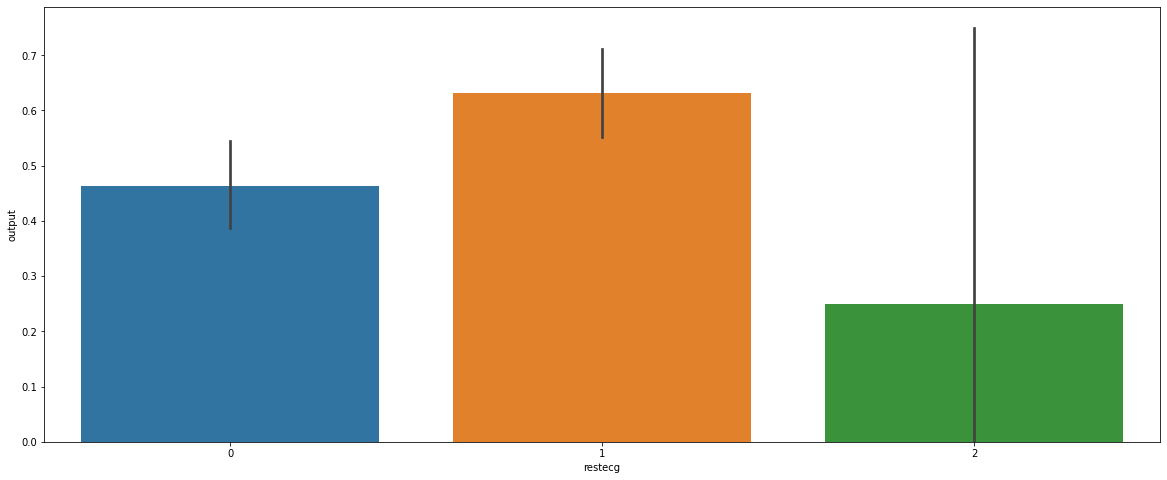

In [97]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="restecg",y="output",data=data)
plt.show()

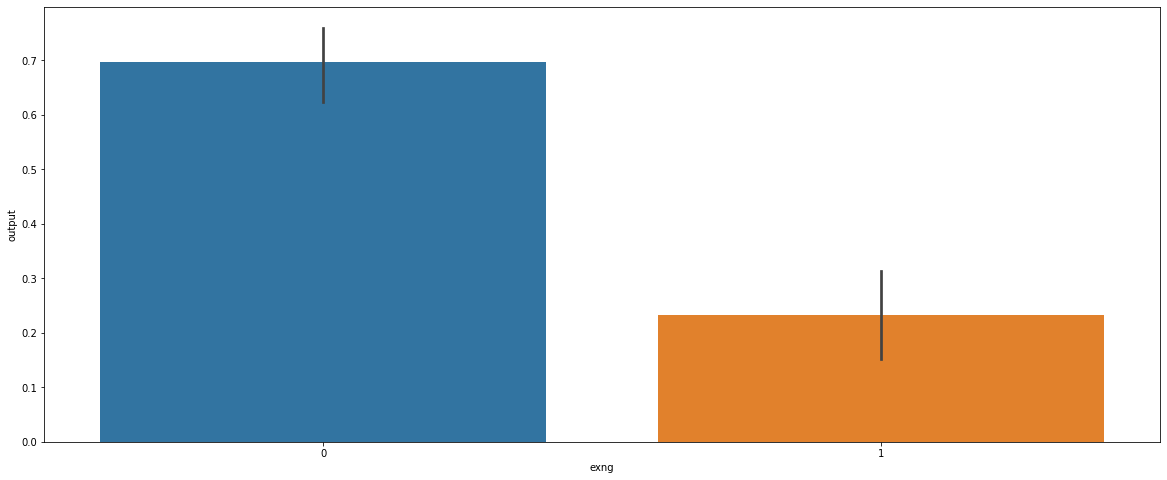

In [98]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="exng",y="output",data=data)
plt.show()

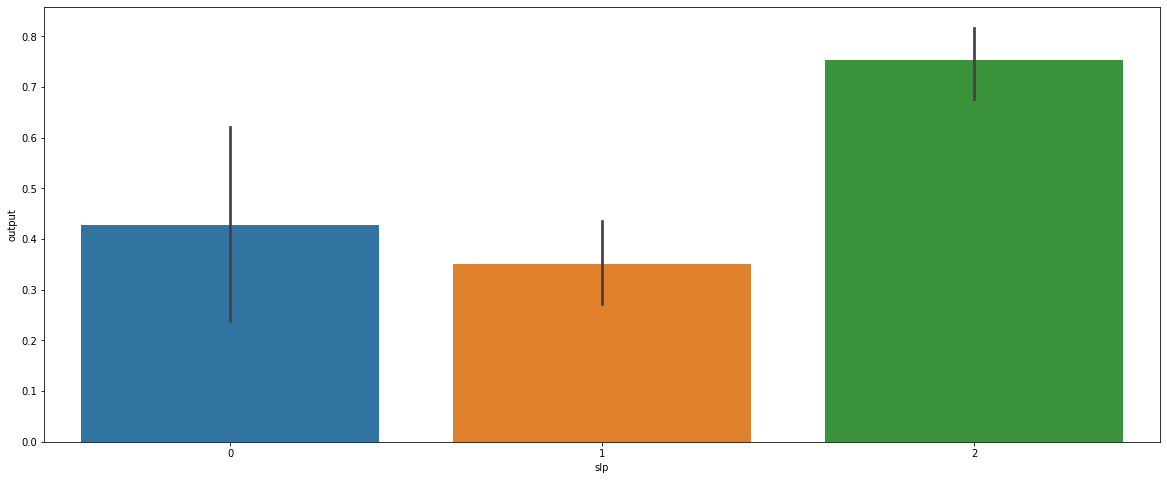

In [33]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="slp",y="output",data=data)
plt.show()

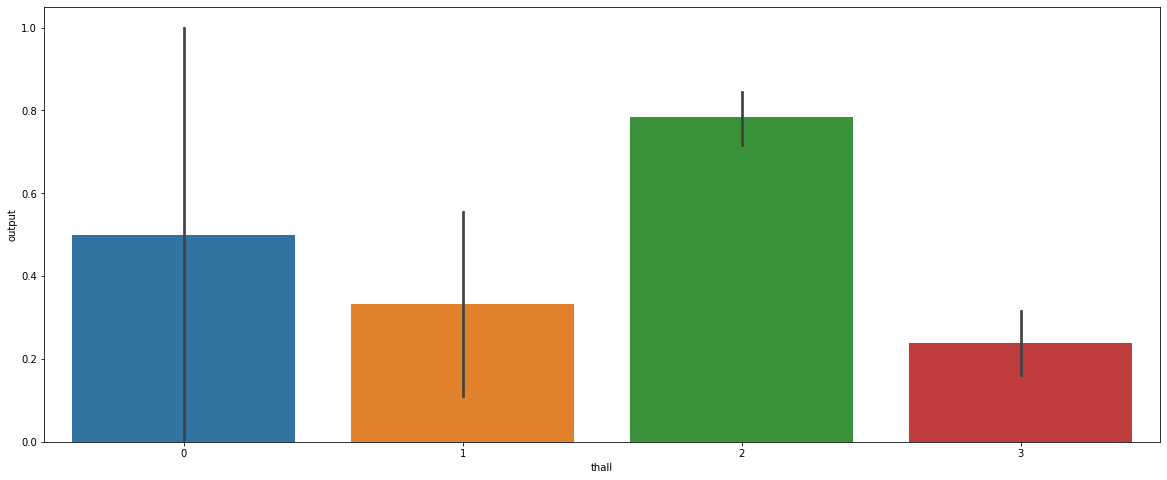

In [34]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="thall",y="output",data=data)
plt.show()

#### 3D

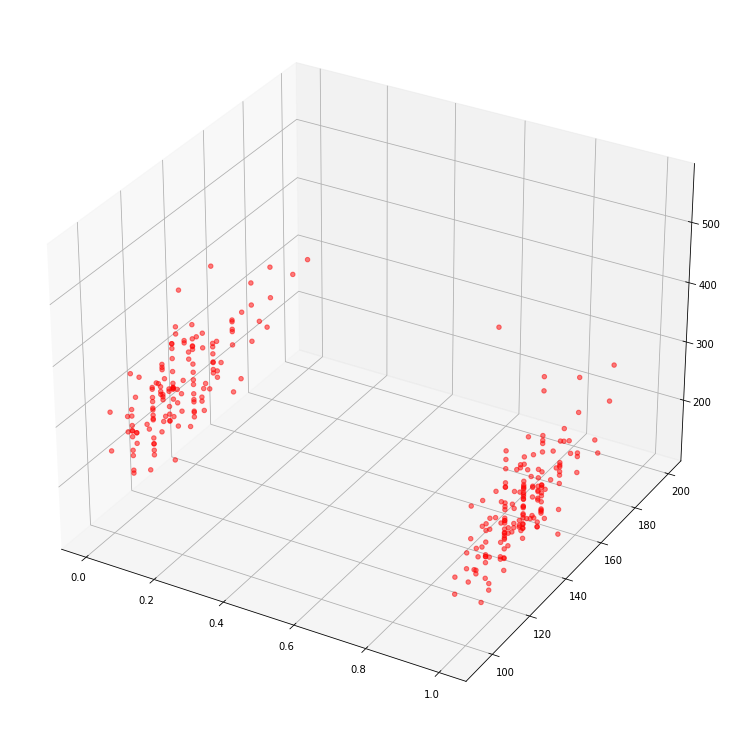

In [102]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataV["output"], dataV["trtbps"], dataV["chol"], c="red", s=20, alpha=0.5)
plt.show()

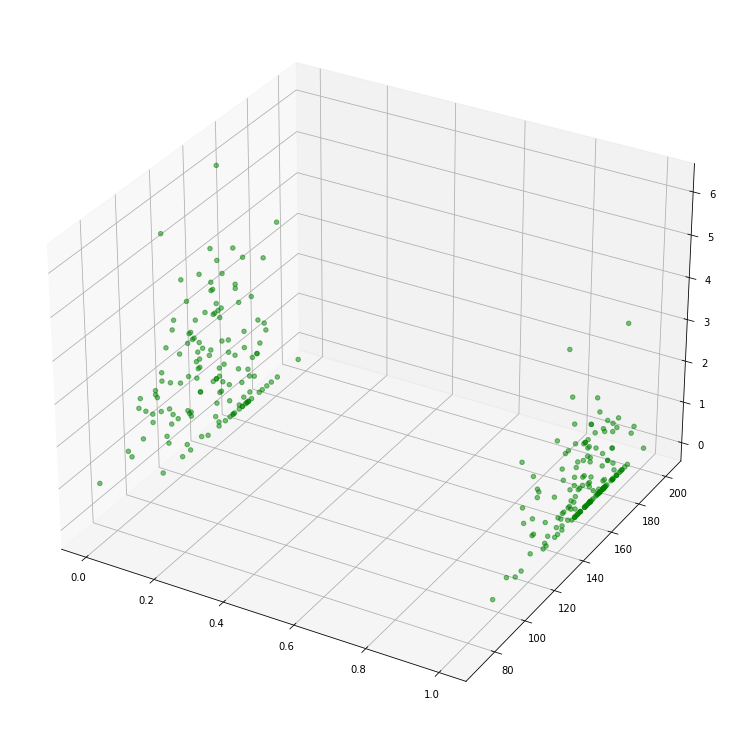

In [103]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataV["output"], dataV["thalachh"], dataV["oldpeak"], c="green", s=20, alpha=0.5)
plt.show()

#### AGAINST VALUES

In [104]:
DataForA = data.copy()

In [105]:
clf = LocalOutlierFactor()
clf.fit_predict(DataForA) #-1 represents the outliers present in the dataset.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

<h2><span style="color:#FFFFFF"><u><mark style="color:#A20080;">Training</mark></u></span></h2><br>

### Splitting the dataset into training and testing set.

In [37]:
x = data.drop("output",axis=1)
y = data["output"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.20,random_state=42)

<h3><span style="color:#A20080"><u>Regression models used for comparison</u></span></h3>

> fitting the training data to the model

In [39]:
lm = LinearRegression().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)

In [43]:
models = [lm,knnr,cartr,rfr]

> For every model, find the mean cross validation score (error), and find the square root of that to compute the root mean square error.


In [45]:
for model in models:
    name = model.__class__.__name__
    crossvalscore = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    #print("-" * 10)
    print(np.sqrt(crossvalscore))
    print("-" * 30)

LinearRegression: 
0.4435589653777706
------------------------------
KNeighborsRegressor: 
0.4853079532871984
------------------------------
DecisionTreeRegressor: 
0.5584843434732633
------------------------------
RandomForestRegressor: 
0.4049291531214059
------------------------------


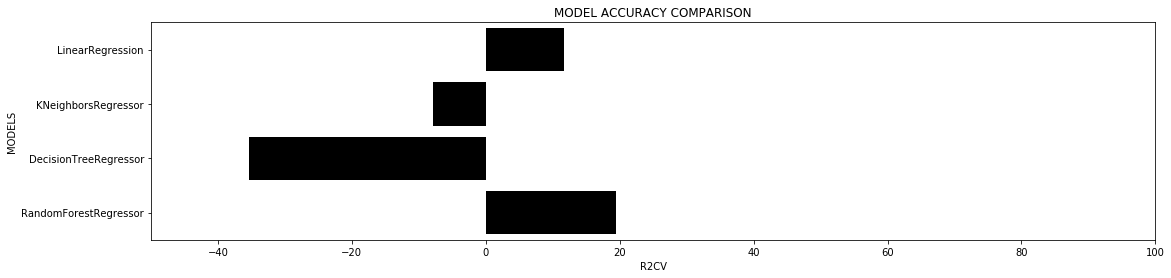

In [64]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean() #use the test set to validate the model.
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(18,4))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(-50,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

<h3><span style="color:#FF0F0F">None of the models seem to be satisfying.</span></h3>

<h3><span style="color:#A20080"><u>Regression models used for comparison</u></span></h3>

In [50]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)

In [52]:
modelsc = [lj,gnb,knnc,cartc,rfc]

In [55]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)  #predict using the model for test set
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    #print("-" * 10)
    print("Accuracy:",accuracy_score(yTest,predict)) #use the predicted scores, and compare with the ytest
    print("Error",np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
Accuracy: 0.8688524590163934
Error 0.4053217416888888
------------------------------
GaussianNB: 
Accuracy: 0.8688524590163934
Error 0.3842122429322725
------------------------------
KNeighborsClassifier: 
Accuracy: 0.6885245901639344
Error 0.6267831705280088
------------------------------
DecisionTreeClassifier: 
Accuracy: 0.7540983606557377
Error 0.511766315719159
------------------------------
RandomForestClassifier: 
Accuracy: 0.8360655737704918
Error 0.42538497969766276
------------------------------


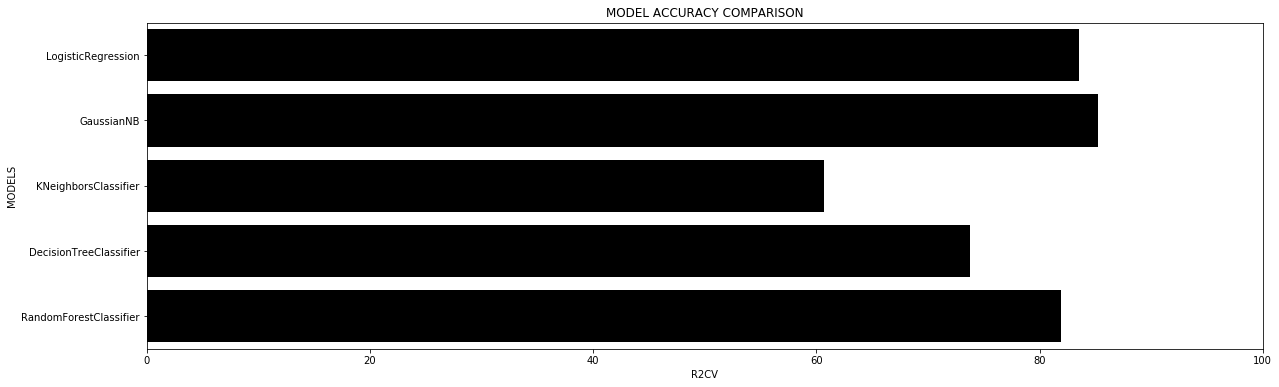

In [60]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
                
figure = plt.figure(figsize=(20,6))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

<h3><span style="color:#FF0F0F">Best score out of all the classification and regression models is GaussianNB --> 0.8688524590163934</span></h3>
